In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
train_df=pd.read_csv('train_LZV4RXX.csv')
test_df=pd.read_csv('test_4zJg83n.csv')

In [112]:
train_df.shape

(7000, 10)

In [113]:
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [114]:
# getting information about columns
train_df.info()
#there in null value in education column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [115]:
#Checking for imbalance data
train_df['loan_default'].value_counts().div(train_df.shape[0])

0    0.6
1    0.4
Name: loan_default, dtype: float64

In [116]:
#checking categorical value for proof_submitted
train_df['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [117]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.5,5250.25,7000.0
age,7000.0,36.096571,7.587700,21.0,29.00,36.0,43.00,50.0
education,6755.0,1.561954,0.496184,1.0,1.00,2.0,2.00,2.0
loan_amount,7000.0,663355.172571,149812.773669,167880.0,577788.00,657108.0,737364.00,1781376.0
asset_cost,7000.0,916299.750857,214492.244573,473352.0,797901.00,858426.0,957675.00,2419200.0
no_of_loans,7000.0,2.853286,5.471932,0.0,0.00,0.0,3.00,109.0
no_of_curr_loans,7000.0,1.371143,2.189278,0.0,0.00,0.0,2.00,33.0
last_delinq_none,7000.0,0.013286,0.114504,0.0,0.00,0.0,0.00,1.0
loan_default,7000.0,0.400000,0.489933,0.0,0.00,0.0,1.00,1.0


In [118]:
numerical_column=[i for i in train_df.columns if train_df[i].dtypes!='O']

In [119]:
#showing mean of defaulted loan by proof_id
train_df.groupby(['proof_submitted']).mean()['loan_default']

proof_submitted
Aadhar      0.389142
Driving     0.464912
PAN         0.412766
Passport    0.230769
VoterID     0.479491
Name: loan_default, dtype: float64

In [120]:
#showing mean of defaulted loan by proof_id
train_df.groupby(['last_delinq_none']).mean()['loan_default']

last_delinq_none
0    0.399160
1    0.462366
Name: loan_default, dtype: float64

In [123]:
numerical_column

['loan_id',
 'age',
 'education',
 'loan_amount',
 'asset_cost',
 'no_of_loans',
 'no_of_curr_loans',
 'last_delinq_none',
 'loan_default']

<AxesSubplot:>

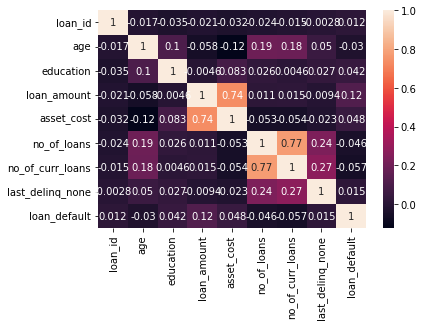

In [124]:
sns.heatmap(train_df.corr(),annot=True)

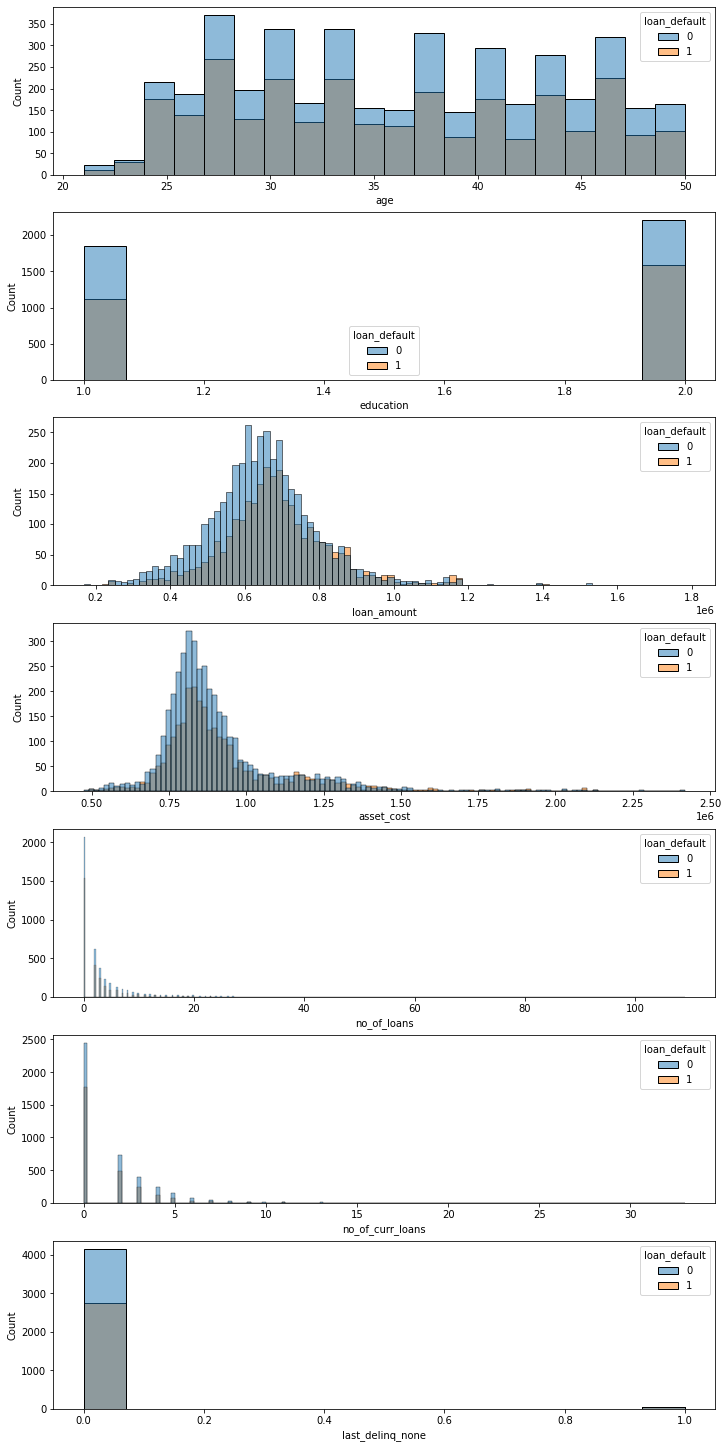

In [125]:
#EDA PART
count=0
fig,ax=plt.subplots(7,figsize=(10,20),constrained_layout=True)
for i in numerical_column[1:-1]:
    sns.histplot(x=i,data=train_df,ax=ax[count],hue=train_df['loan_default'])
    count+=1

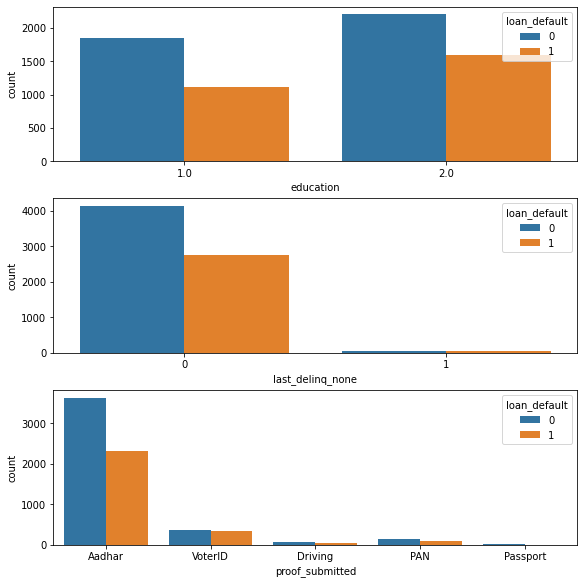

In [126]:
count=0
fig,ax=plt.subplots(3,figsize=(8,8),constrained_layout=True)
for i in train_df[['education','last_delinq_none','proof_submitted']].columns:
    sns.countplot(x=i,data=train_df[['education','last_delinq_none','loan_default','proof_submitted']],ax=ax[count],hue='loan_default')
    count+=1

<AxesSubplot:xlabel='asset_cost'>

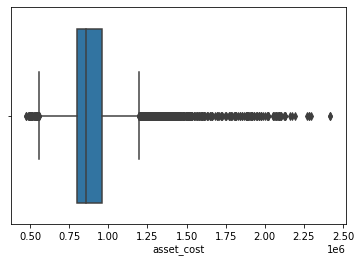

In [127]:
sns.boxplot(x=train_df['asset_cost'])

<AxesSubplot:xlabel='loan_amount'>

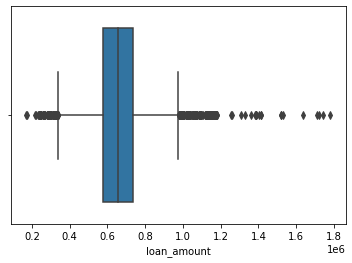

In [128]:
sns.boxplot(x=train_df['loan_amount'])

In [129]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,Y_train,Y_test=train_test_split(train_df.iloc[:,:-1],train_df.iloc[:,-1],random_state=42,test_size=0.25,stratify=train_df.iloc[:,-1])

In [130]:
train_df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [131]:
new_numerical_column=['age','education','loan_amount','no_of_loans','last_delinq_none']
categorical_column=['proof_submitted']
num_pipeline = Pipeline(steps=[
                ('imputer', KNNImputer()),('scale',StandardScaler())
            ]
            )
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy="most_frequent")),
                 ('one_hot_encoder', OneHotEncoder())])
preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, new_numerical_column),
                ('cat_pipeline', cat_pipeline, categorical_column),
            ])
obj=preprocessing.fit_transform(X_train,Y_train)
obj[0].shape

(10,)

In [132]:
from sklearn.ensemble import RandomForestClassifier
classify=RandomForestClassifier(max_depth=6,ccp_alpha=1e-100,n_jobs=2).fit(obj,Y_train)

In [133]:
transformed_test=preprocessing.transform(X_test)
classify.score(transformed_test,Y_test)

0.6057142857142858

In [134]:
classify.score(obj,Y_train)

0.6257142857142857

In [135]:
test_df=pd.read_csv('test_4zJg83n.csv')

In [137]:
testing_preprocessing=preprocessing.transform(test_df)
pred=classify.predict(testing_preprocessing)

In [154]:
submission=pd.DataFrame(np.array([test_df.loan_id,pred]).T,columns=['loan_id','loan_default'])
submission.to_csv('sample_submission.csv',index=False)